# KNN Application

In [66]:
import numpy as np
import pandas as pd

from sklearn import datasetsa
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [57]:
# Data: https://archive.ics.uci.edu/ml/machine-learning-databases/tae/tae.names
df = pd.read_csv('data/ta.csv')
df.head()

,english,instructor,course,summer,class_size,class_att
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [62]:
X = df.iloc[:,0:5]
y = df.class_att
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=123,stratify=y)

In [63]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

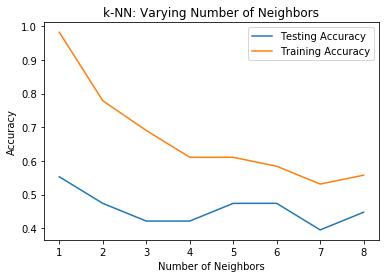

In [64]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Classification Metrics

In [69]:
# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors = 6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[5 4 3]
 [5 7 1]
 [5 2 6]]
              precision    recall  f1-score   support

           1       0.33      0.42      0.37        12
           2       0.54      0.54      0.54        13
           3       0.60      0.46      0.52        13

   micro avg       0.47      0.47      0.47        38
   macro avg       0.49      0.47      0.48        38
weighted avg       0.49      0.47      0.48        38

